## Chi-square

Compute chi-squared test between categorical features and classification target.

$$X^2 = \sum_{}^{}\frac{(observed — expected)^2}{expected}$$

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

In [2]:
variables = ['pclass', 'survived', 'sex', 'sibsp', 'parch', 'embarked']

data = pd.read_csv("../titanic.csv", usecols=variables)

data.head()

,pclass,survived,sex,sibsp,parch,embarked
0,1,1,female,0,0,S
1,1,1,male,1,2,S
2,1,0,female,1,2,S
3,1,0,male,1,2,S
4,1,0,female,1,2,S


In [3]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("survived", axis=1),
    data['survived'],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((914, 5), (392, 5))

In [4]:
# contingency table for gender

c = pd.crosstab(y_train, X_train['sex'])

c

sex,female,male
survived,,
0,90,477
1,228,119


In [5]:
chi2_contingency(c)

(233.4328744513778,
 1.0634411614151734e-52,
 1,
 array([[197.27133479, 369.72866521],
        [120.72866521, 226.27133479]]))

In [6]:
# To rank all features

chi_ls = []

for feature in X_train.columns:
    
    # create contingency table
    c = pd.crosstab(y_train, X_train[feature])
    
    # chi_test
    p_value = chi2_contingency(c)[1]
    chi_ls.append(p_value)

Text(0.5, 1.0, 'Feature importance based on chi-square test')

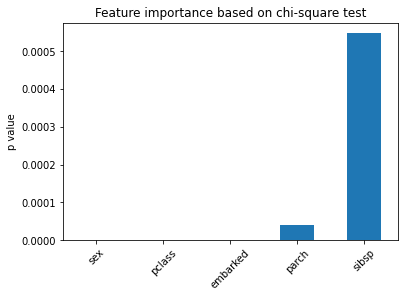

In [7]:
pd.Series(chi_ls, index=X_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel('p value')
plt.title('Feature importance based on chi-square test')

In [8]:
# select top 3

selected = pd.Series(chi_ls, index=X_train.columns).sort_values(
    ascending=True)[0:3].index

selected

Index(['sex', 'pclass', 'embarked'], dtype='object')

In [9]:
# sklearn returns numpy arrays. Convert to dataframe

X_train = X_train[selected]
X_test = X_test[selected]

X_train.head()

,sex,pclass,embarked
840,male,3,S
866,male,3,S
427,male,2,S
478,male,2,C
1305,male,3,S
